Abgabe von: Mat.Nr.: 9452857 & 1113800

Aufteilung: <br>
Import, Regression Models: Matr. Nr 9452857 <br>
Hyperparameter Tuning, Comments: Matr. Nr 1113800

Before doing anything installing all needed dependencies

In [ ]:
!pip3 install -U pandas
!pip3 install -U scikit-learn
!pip3 install -U matplotlib

# Aufgabe 1

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(transform_output="pandas")

Import data

In [3]:
white_raw = pd.read_csv(os.getcwd() + "/dataset/winequality-white.csv", delimiter=";")
red_raw = pd.read_csv(os.getcwd() + "/dataset/winequality-red.csv", delimiter=";")

Split wine in Test and Training Data (75% / 25%)

In [4]:
red_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
white_training_Data, white_test_data, white_training_scores, white_test_scores = (train_test_split(white_raw.drop("quality", axis=1), white_raw['quality'],test_size=0.25, random_state=39))

red_training_Data, red_test_data, red_training_scores, red_test_scores = (train_test_split(red_raw.drop("quality", axis=1), red_raw['quality'],test_size=0.25, random_state=39))

In [6]:
white_training_Data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3965,7.3,0.380,0.23,6.50,0.050,18.0,102.0,0.99304,3.10,0.55,11.2
3954,6.3,0.330,0.20,17.90,0.066,36.0,161.0,0.99910,3.14,0.51,8.8
580,7.4,0.410,0.66,10.80,0.051,77.0,194.0,0.99760,3.05,0.46,8.7
1637,8.1,0.120,0.49,1.20,0.042,43.0,160.0,0.99340,3.13,0.48,9.7
1310,5.2,0.365,0.08,13.50,0.041,37.0,142.0,0.99700,3.46,0.39,9.9
...,...,...,...,...,...,...,...,...,...,...,...
3195,7.0,0.210,0.42,5.30,0.037,36.0,123.0,0.99321,3.14,0.52,10.9
2275,7.5,0.290,0.26,14.95,0.067,47.0,178.0,0.99838,3.04,0.49,9.2
1088,7.4,0.200,0.37,16.95,0.048,43.0,190.0,0.99950,3.03,0.42,9.2
105,7.3,0.130,0.32,14.40,0.051,34.0,109.0,0.99740,3.20,0.35,9.2


# Aufgabe 2

Performing a Principal Component Analysis

we need to standardize features with StandardScaler(). We do this to make sure that different features have the same impact on the result

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

white_training_Data_scaled = scaler.fit_transform(white_training_Data)
white_test_data_scaled = scaler.transform(white_test_data)

red_training_Data_scaled = scaler.fit_transform(red_training_Data)
red_test_data_scaled = scaler.transform (red_test_data)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pcaWhite = PCA(n_components='mle')
white_training_Data_pca = pcaWhite.fit_transform(white_training_Data_scaled)
white_test_data_pca = pcaWhite.transform(white_test_data_scaled)

In [10]:
pcaRed = PCA(n_components='mle')
red_training_Data_pca = pcaRed.fit_transform(red_training_Data)
red_test_data_pca = pcaRed.transform(red_test_data)

# Aufgabe 3

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def plot_metrics(test_scores, test_predictions): 
    cm = confusion_matrix(test_scores, test_predictions.round(), labels=[0, 1,2,3,4,5,6,7,8,9,10])
    cm_disp = ConfusionMatrixDisplay(cm)
    cm_disp.plot()

In [12]:
import numpy as np
from math import sqrt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error


# Function to calculate model and print Bewertungsmetriken
def model_regressor_grid_calculator(estimator: any, param_grid: dict | list,
                               training_data: any, valid_data: any, training_scores: any, valid_scores: any):
    #select the best HyperParameters while using cross-validation for it (cv=3)
    random_search = GridSearchCV(estimator, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
    random_search.fit(training_data, training_scores)
    
    print("Beste Hyperparameter: " + str(random_search.best_params_))
    
    # Select the best model from Grid Search
    optimal_model = random_search.best_estimator_
    
    # Selected Params
    cv_results = pd.DataFrame(random_search.cv_results_).loc[random_search.best_index_]
    
    r2_score_cv = [cv_results['split0_test_score'], 
                   cv_results['split1_test_score'],
                   cv_results['split2_test_score'],
                   ]
    r2_score_cv_mean = cv_results['mean_test_score']
    r2_score_cv_std = cv_results['std_test_score']
    
    print('Cross Validation')
    print(f'- R^2: {r2_score_cv}')
    print(f'- R^2 Durchschnittlicher: {r2_score_cv_mean:.4f}')
    print(f'- R^2 Standardabweichung: {r2_score_cv_std:.4f}')
    print('\r\n')
    
    
    predicted_test_scores = optimal_model.predict(valid_data)
    
    r2_score_test = r2_score(valid_scores, predicted_test_scores)
    rmse_test = sqrt(mean_squared_error(valid_scores, predicted_test_scores))
    mape_test = mean_absolute_percentage_error(valid_scores, predicted_test_scores)
    
    print('Test:')
    print(f'- R^2: {r2_score_test:.4f}')
    print(f'- RMSE: {rmse_test:.2f}')
    print(f'- MAPE: {mape_test:.2%}')
    
    plot_metrics(valid_scores, predicted_test_scores)
    
    return cv_results, optimal_model

Implementing two Regression methods: Nearest Neighbor Regression and Support Vector Regression. Comparing the performance of both regression models at both datasets.

## White

### Nearest Neighbor Regression

Beste Hyperparameter: {'leaf_size': 1, 'n_neighbors': 23, 'weights': 'distance'}
Cross Validation
- R^2: [0.4439410001966234, 0.4578456890889915, 0.46936491337660613]
- R^2 Durchschnittlicher: 0.4571
- R^2 Standardabweichung: 0.0104


Test:
- R^2: 0.4862
- RMSE: 0.64
- MAPE: 7.66%


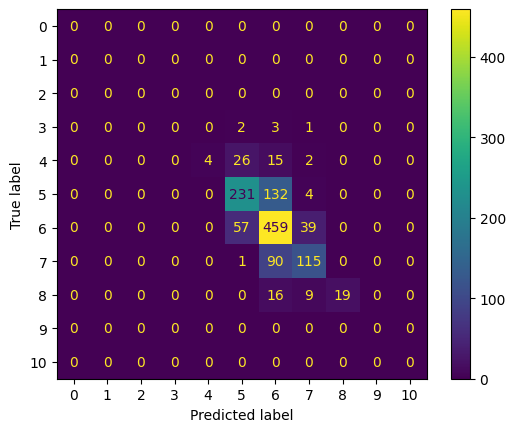

In [13]:
parameters = {
    'n_neighbors': np.arange(1, 70, 1),
    'leaf_size' : np.arange(1, 50, 1),
    'weights': ['uniform', 'distance']
}
final_parameters = {
    'n_neighbors': [23],
    'leaf_size' : [1],
    'weights': ['distance']
}
knn_regressor = KNeighborsRegressor()
cv_results, optimal_model = model_regressor_grid_calculator(estimator=knn_regressor, param_grid=final_parameters, training_data=white_training_Data_pca, valid_data=white_test_data_pca, training_scores=white_training_scores, valid_scores=white_test_scores)


### Support Vektor Regression

Beste Hyperparameter: {'C': 1.631578947368421, 'epsilon': 0.3111111111111111, 'kernel': 'rbf'}
Cross Validation
- R^2: [0.35387360216597596, 0.4023140411195696, 0.4207932174740727]
- R^2 Durchschnittlicher: 0.3923
- R^2 Standardabweichung: 0.0282


Test:
- R^2: 0.3616
- RMSE: 0.71
- MAPE: 9.86%


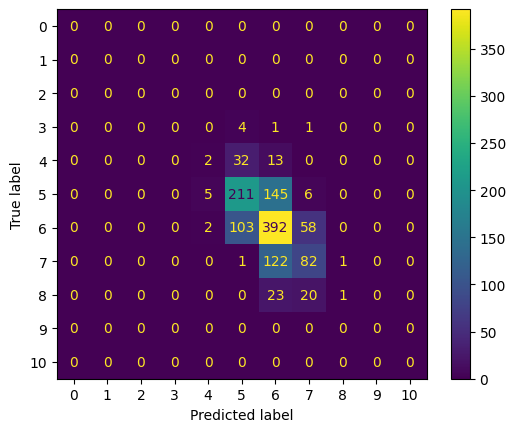

In [14]:
parameters = {
    'kernel': ['rbf'],
    'epsilon': np.linspace(0.2, 0.4, 10),
    'C': np.linspace(1, 5, 20),
}
final_parameters = {'C': [1.631578947368421], 'epsilon': [0.3111111111111111], 'kernel': ['rbf']}

svm_regressor = SVR()
cv_results, optimal_model = model_regressor_grid_calculator(estimator=svm_regressor, param_grid=final_parameters, training_data=white_training_Data_pca, valid_data=white_test_data_pca, training_scores=white_training_scores, valid_scores=white_test_scores)

The Nearest Neighbor Regression analysis for white wine provided a R^2 value of 0,4862, where as the SVR analysis delivered a R^2 value of 0,3616. The decreased value indicates a weaker explanatory power compared to the Nearest Neighbor Regression.
Also, the RMSE value rose from 0,64 at Nearest Neighbor Regression to 0,71 in the Support Vector Regression. Therefore, the value shows a higher deviation between the predicted and actual values.
Furthermore, the MAPE value rose from 7,66% to 9,86%, indicating a higher percentage average deviation.
In conclusion, the Nearest Neighbor Regression provides a better performance in comparison to the Support Vector Regression.

## Red

### Nearest Neighbor Regression

Beste Hyperparameter: {'leaf_size': 1, 'n_neighbors': 19, 'weights': 'distance'}
Cross Validation
- R^2: [0.2569778231764722, 0.28101540049050555, 0.21336805786223734]
- R^2 Durchschnittlicher: 0.2505
- R^2 Standardabweichung: 0.0280


Test:
- R^2: 0.2810
- RMSE: 0.74
- MAPE: 9.36%


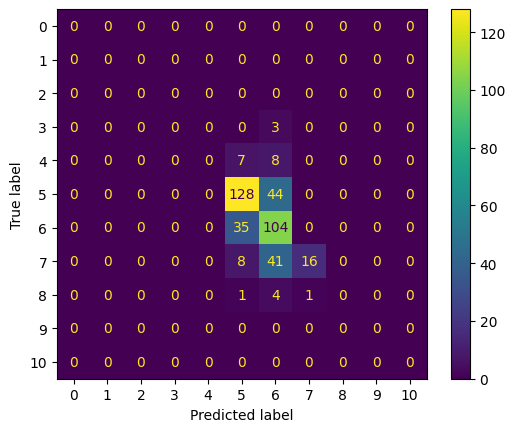

In [15]:
parameters = {
    'n_neighbors': np.arange(1, 70, 1),
    'leaf_size' : np.arange(1, 50, 1),
    'weights': ['uniform', 'distance']
}
final_parameters = {
    'n_neighbors': [19],
    'leaf_size' : [1],
    'weights': ['distance']
}
knn_regressor = KNeighborsRegressor()
cv_results, optimal_model = model_regressor_grid_calculator(estimator=knn_regressor, param_grid=final_parameters, training_data=red_training_Data_pca, valid_data=red_test_data_pca, training_scores=red_training_scores, valid_scores=red_test_scores)


### Support Vektor Regression

Beste Hyperparameter: {'C': 67.77777777777777, 'epsilon': 0.2899999999999999, 'kernel': 'rbf'}
Cross Validation
- R^2: [0.29053634264358497, 0.3103429817566672, 0.2715251995718748]
- R^2 Durchschnittlicher: 0.2908
- R^2 Standardabweichung: 0.0158


Test:
- R^2: 0.3914
- RMSE: 0.68
- MAPE: 9.77%


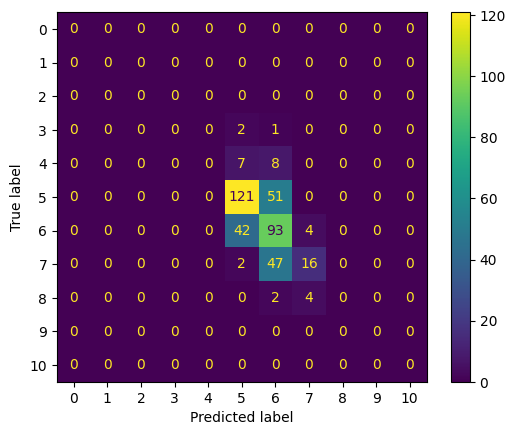

In [16]:
parameters = {
    'kernel': ['rbf'],
    #'gamma' : ['scale', 'auto'],
    'epsilon': np.arange(0.1, 0.30, 0.01),
    'C': np.linspace(60, 70, 10),
}

final_parameters = {'C': [67.77777777777777], 'epsilon': [0.2899999999999999], 'kernel': ['rbf']}

svm_regressor = SVR()
cv_results, optimal_model = model_regressor_grid_calculator(estimator=svm_regressor, param_grid=final_parameters, training_data=red_training_Data_pca, valid_data=red_test_data_pca, training_scores=red_training_scores, valid_scores=red_test_scores)

For the red wine, the Support Vector Regression outperforms the Nearest Neighbor-Regression. The higher R^2 value (0,3914 vs 0,2810) indicates that the model explains a larger proportion of variance in the dataset. The other metrics also achieve better results, like a slightly higher MAPE value.

## Conclusion
The Nearest Neighbor Regression based on the dataset for the white wine outperforms both its counterparts for the red wine, by relying on a larger dataset (~3 times larger).
Despite that, the Support Vector Regression model for red wine outperforms the white wine SVR with its R^2 and MAPE, which indicates a better fit to the red wine dataset.

In conclusion, the Nearest Neighbor Regression model seems to perform better for white wine, while the Support Vector Regression model seems to deliver better results for the red wine.